In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gc
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [4]:
data=pd.read_csv("../input/yahoo-troll-question-detection/train_df.csv")
data.head()                

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


# Data Cleaning

In [5]:
data=data.drop(['qid'],axis=1)
data.head(2)

,question_text,target
0,What are interesting facts about Microsoft his...,0
1,What are those things which are not gonna happ...,0


In [6]:
data.isna().sum()

question_text    0
target           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(1000000, 2)

# EDA

In [9]:
data['target'].value_counts()            # 1-troll 

0    938130
1     61870
Name: target, dtype: int64

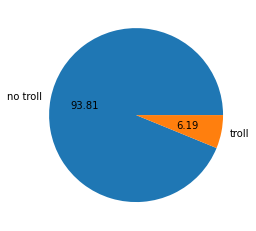

In [10]:
plt.pie(data['target'].value_counts(),labels=['no troll','troll'],autopct="%0.2f")
plt.show()

#  Data Preprocessing

In [9]:
# import nltk
# import re 
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# # nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# ob=PorterStemmer()
# lt=WordNetLemmatizer()

In [10]:
#nltk.download()
#nltk.download('omw-1.4')

In [11]:
# def lowercase(text):
#     text=text.lower()
#     #print(text)
#     return text

In [12]:
# def tokenize(text):
#     text=text.split()
#     #print(text)
#     return text
    

In [13]:
# def regularization(text):
#     text=re.sub('[^a-zA-Z]',' ',text)
#     #print(text)
#     return text
    

In [14]:
# def removestopword(text):
#     text=[word for word in text if not word in stopwords.words('english')]
#     #print(text)
#     return text

In [15]:
# def stemming(text):
#     tt=[ob.stem(word) for word in text]
#     text=tt[:]
#     #print(text)
#     return text
        
    

In [16]:
# def lemmatizer(text):
#     tp=[lt.lemmatize(word) for word in text]
#     text=tp[:]
#     #print(text)
#     return text


In [17]:
# def processing_text(text):
#     text=regularization(text)
#     text=lowercase(text)
#     text=tokenize(text)
#     #print(text)
#     text=removestopword(text)
#     text=lemmatizer(text)
#     text=stemming(text)
#     text=" ".join(text)
#     return text

         

In [18]:
# ## text after preprocessing
# print("Statement: How can we prove that ( [math]\pi, e, \sqrt[3]{3})[/math] are non-existing and fiction numbers in elementary pure mathematics?")
# processing_text("How can we prove that ( [math]\pi, e, \sqrt[3]{3})[/math] are non-existing and fiction numbers in elementary pure mathematics?") 

In [19]:
# # preprocessing the training dataset


# processed_text=[]
# for i in range(len(data)):
#     processed_text.append(processing_text(data['question_text'][i]))
# # processed_text
    
    
    

In [20]:
## printing preprocessed training dataset

# print(processed_text[0:5]) 
# print(len(processed_text))

In [21]:
# ## reading testing dataset

# test_data=pd.read_csv('../input/yahoo-troll-question-detection/test_df.csv')
# test_data.head(5)

In [22]:
# test_data=test_data.drop(['qid'],axis=1)
# print(test_data.head(3))
# print(test_data.shape)

In [23]:
# # preprocessing of testing dataset

# test_processed=[]
# for i in range(len(test_data)):
#     test_processed.append(processing_text(test_data['question_text'][i]))
# #test_processed

In [24]:
## printing the preprocessed training data

# print(test_processed[0:5])
# print(len(test_processed))

In [25]:
# # saving preprocessed data using pickle

# file1='trained_preprocessedls_data.pkl'
# file2='test_preprocessed_datals.pkl'
# pickle.dump(processed_text, open(file1,'wb'))
# pickle.dump(test_processed, open(file2,'wb'))


In [11]:
## loading the saved preprocessed training and testing data

processedtext=pickle.load(open('../input/trained-preprocessedls-datapkl/trained_preprocessedls_data.pkl','rb'))
testprocessed=pickle.load(open('../input/test-preprocessed-datalspkl/test_preprocessed_datals.pkl','rb'))

In [27]:
# merged_data=processed_text+test_processed

In [12]:
## merging the preprocessed training and testing data for their conversion to vectors
mergeddata=processedtext+testprocessed

In [13]:
## importing libraries for TF-IDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=4000)

In [14]:
## vectorization of training and testing data

#Cv_X=cv.fit_transform(processed_text).toarray()    # BAG OF WORDS
Tfdif_X=tfidf.fit_transform(mergeddata).toarray()   #TF-IDF

In [15]:
## spliting the training and testing data after vectorizaion
traindata=Tfdif_X[0:len(processedtext),:]
testdata=Tfdif_X[len(processedtext):,:]


In [16]:
del Tfdif_X
gc.collect()

2362

In [17]:
print(traindata.shape)
print(testdata.shape)

(1000000, 4000)
(306122, 4000)


In [18]:
# print(traindata[0:100,0:100])

# Training Model

In [19]:
## target for training data
Y_train=data['target'][:]

In [20]:
del data
gc.collect()

92

In [21]:
del mergeddata
gc.collect()

23

In [22]:
del processedtext
gc.collect()
del testprocessed
gc.collect()

0

In [21]:
# from imblearn.under_sampling import NearMiss
# us=NearMiss()
# X_us,Y_us=us.fit_resample(traindata,Y_train)

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(traindata, Y_train)

In [24]:
tstdata=pd.read_csv('../input/yahoo-troll-question-detection/test_df.csv')
tstdata.head(3)

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."


# 1.Logistic Regression

In [25]:
## importing model for training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
model1=lr.fit(X_res,y_res)

In [ ]:
y_pred_lr_ls_us=model1.predict(testdata)

In [ ]:
type(y_pred_lr_ls_us)

In [ ]:
lrtst=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_lr_ls_us})

In [ ]:
lrtst.head(3)

In [ ]:
lrtst.to_csv('lrmodel_ls_us.csv',index=False)

# 2.Logistic Regression with Grid SearchCV

In [26]:
from sklearn.linear_model import LogisticRegression
log_model2 = LogisticRegression(solver = 'liblinear')

In [46]:
log_params = [{'solver' : ['liblinear'],'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01,0.001]}]

In [47]:
gscv = GridSearchCV(estimator = log_model2,param_grid = log_params,cv = 5,scoring = 'f1')

In [48]:
gscv.fit(X_res,y_res)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                          'penalty': ['l2'], 'solver': ['liblinear']}],
             scoring='f1')

In [50]:
y_pred_lr_ls_us1=gscv.predict(testdata)

In [51]:
type(y_pred_lr_ls_us1)

numpy.ndarray

In [52]:
lrtst1=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_lr_ls_us1})

In [53]:
lrtst1.head(3)

,qid,target
0,a4f3da3a3df9dd881edd,0
1,9914c62ed3f69684d549,0
2,8138ae48649e37091a91,1


In [55]:
lrtst1.to_csv('lrmodel_ls_us_gridsearch.csv',index=False)

# 3.Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
model2=nb.fit(X_res,y_res)

In [ ]:
y_pred_nb_us=model2.predict(testdata)  # prediction using naive bayes model

In [ ]:
print(type(y_pred_nb_us))

In [ ]:
nbtst=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_nb_us})

In [ ]:
nbtst.head(3)

In [ ]:
nbtst.to_csv('nbmodel_ls_us.csv',index=False)

In [ ]:

modelfile1='logisiticmodel_l+s'
modelfile2='naivemodel_l+s'
pickle.dump(model1,open(modelfile1,'wb'))
pickle.dump(model2,open(modelfile2,'wb'))

# 4.Decision Tree Classifier with GridSearchCV

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [28]:
dt_params = [{'max_depth' : [10,20,50,100],'min_impurity_decrease' : [0.1,0.2,0.3]}]

In [29]:
gscv2 = GridSearchCV(estimator = dt_model,param_grid = dt_params,cv = 5,scoring = 'f1')

In [30]:
gscv2.fit(X_res,y_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [10, 20, 50, 100],
                          'min_impurity_decrease': [0.1, 0.2, 0.3]}],
             scoring='f1')

In [32]:
y_pred_dt_us=gscv2.predict(testdata)

In [34]:
type(y_pred_dt_us)

numpy.ndarray

In [35]:
dttst=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_dt_us})

In [36]:
dttst.head(3)

,qid,target
0,a4f3da3a3df9dd881edd,0
1,9914c62ed3f69684d549,0
2,8138ae48649e37091a91,0


In [37]:
dttst.to_csv('lrmodel_ls_us_decisiontree.csv',index=False)

# SVM

In [ ]:
#from sklearn.svm import SVC
#sv=SVC(kernel='linear')
#model3=sv.fit(X_res,y_res)

In [ ]:
#y_pred_sv_us=model3.predict(testdata) #prediction using SVM 

In [ ]:
#print(type(y_pred_sv_us))

In [ ]:
# svtst=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_sv_us})

In [ ]:
#svtst.head(3)

In [ ]:
#svtst.to_csv('svmmodel_ls_us.csv',index=False)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100)
# model_dt=clf_gini.fit(traindata,Y_train)

# XGBoost

In [30]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=100)
model4=xgb_model.fit(X_res, y_res)

In [ ]:
y_pred_xgb_us=model4.predict(testdata) #prediction using SVM

In [ ]:
print(type(y_pred_xgb_us))